# Handling Missing Values
### 1) Take a first look at the data

In [30]:
import pandas as pd
import numpy as np

np.random.seed(0)

sf_permits = pd.read_csv("datasets/building_permits/Building_Permits.csv")

c:\users\mis\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


### 2) How many missing data points do we have?

What percentage of the values in the dataset are missing?  Your answer should be a number between 0 and 100.  (If 1/4 of the values in the dataset are missing, the answer is 25.)

In [8]:
missing_values_count = sf_permits.isnull().sum()
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print(percent_missing)

26.26002315058403


### 3) Figure out why the data is missing

Look at the columns **"Street Number Suffix"** and **"Zipcode"** from the [San Francisco Building Permits dataset](https://www.kaggle.com/aparnashastry/building-permit-applications-data). Both of these contain missing values. 
- Which, if either, are missing because they don't exist? 
- Which, if either, are missing because they weren't recorded?  

Once you have an answer, run the code cell below.

In [10]:
missing_values_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

#### *Keynote:*
> **missing** because data dont exist if shape[1] == missing.values  
> **missing** because data weren't recorded if shape[1] >= missing.values

In [12]:
missing = sf_permits['Street Number Suffix'].isnull().sum()
total_row = sf_permits.shape
print("missing values:", missing)
print("total rows:", total_row[0])

missing values: 196684
total rows: 198900


In [13]:
missing = sf_permits['Zipcode'].isnull().sum()
total_row = sf_permits.shape
print("missing values:", missing)
print("total rows:", total_row[0])

missing values: 1716
total rows: 198900


### 4) Drop missing values: rows

If you removed all of the rows of `sf_permits` with missing values, how many rows are left?

**Note**: Do not change the value of `sf_permits` when checking this.  

In [14]:
total_rows = np.product(sf_permits.dropna().shape)
total_rows

0

### 5) Drop missing values: columns

Now try removing all the columns with empty values.  
- Create a new DataFrame called `sf_permits_with_na_dropped` that has all of the columns with empty values removed.  
- How many columns were removed from the original `sf_permits` DataFrame? Use this number to set the value of the `dropped_columns` variable below.

In [15]:
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)

dropped_columns = sf_permits.shape[1] - sf_permits_with_na_dropped.shape[1] 


### 6) Fill in missing values automatically

Try replacing all the NaN's in the `sf_permits` data with the one that comes directly after it and then replacing any remaining NaN's with 0.  Set the result to a new DataFrame `sf_permits_with_na_imputed`.

In [16]:
sf_permits_with_na_imputed = sf_permits.fillna(method='bfill', axis=0).fillna(0)

In [17]:
sf_permits_with_na_imputed

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


# Scaling and Normalization

In [3]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

kickstarters_2017 = pd.read_csv("datasets/kickstarter_projects/ks-projects-201801.csv")

Let's start by scaling the goals of each campaign, which is how much money they were asking for.  The plots show a histogram of the values in the "usd_goal_real" column, both before and after scaling.  

In [4]:
kickstarters_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


Text(0.5, 1.0, 'Scaled Data')

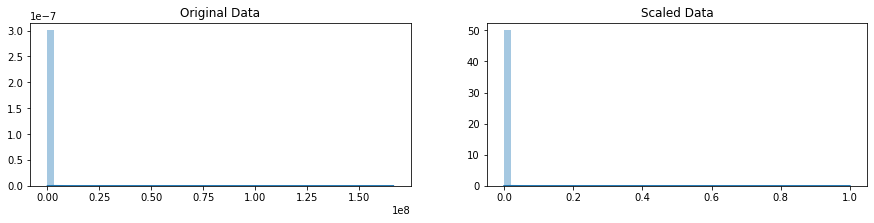

In [12]:
# select the usd_goal_real column and set it to a new dataframe
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

# plot the original and scaled data together
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.distplot(original_data, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title('Scaled Data')

After scaling, all values lie between 0 and 1 (you can read this in the horizontal axis of the second plot above, and we verify in the code cell below).

In [13]:
print('Original data \nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
     '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('Scaled data \nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
     '\nMaximum value:', float(scaled_data.max()))

Original data 
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________
Original data 
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


### 1) Practice scaling

We just scaled the "usd_goal_real" column. What about the "goal" column?

Begin by running the code cell below to create a DataFrame `original_goal_data` containing the "goal" column.

In [15]:
# select the goal column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

Use `original_goal_data` to create a new DataFrame `scaled_goal_data` with values scaled between 0 and 1. You must use the `minimax_scaling()` function.

Text(0.5, 1.0, 'Scaled Data')

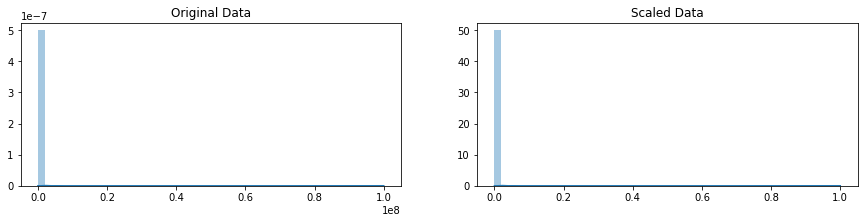

In [17]:
scaled_goal_data =  minmax_scaling(original_goal_data, columns=['goal'])
# plot the original and scaled data together
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.distplot(original_goal_data, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(scaled_goal_data, ax=ax[1])
ax[1].set_title('Scaled Data')

### 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

Text(0.5, 1.0, 'Normalized Data')

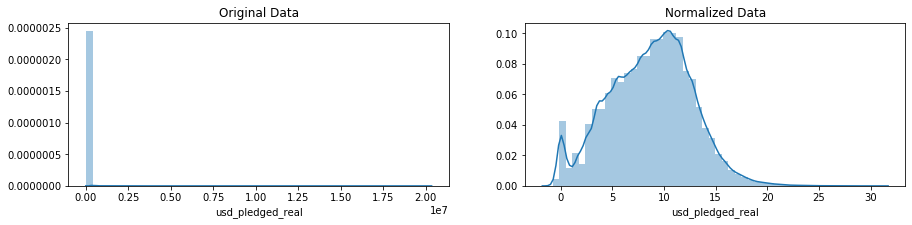

In [24]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges using their indexes
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges using Box-Cox
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                              name='usd_pledged_real', index=positive_pledges.index)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title('Normalized Data')

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to a normal distribution!

In [22]:
print('Original data \nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
     '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('Normalized data \nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
     '\nMaximum value:', float(normalized_pledges.max()))

Original data 
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________
Normalized data 
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column. 

Text(0.5, 1.0, 'Normalized Data')

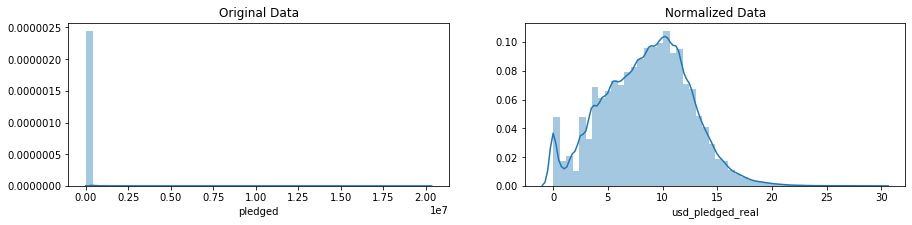

In [25]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges using their indexes
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

# normalize the pledges using Box-Cox
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                              name='usd_pledged_real', index=positive_pledges.index)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title('Normalized Data')

In [26]:
print('Original data \nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
     '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('Normalized data \nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
     '\nMaximum value:', float(normalized_pledges.max()))

Original data 
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Minimum value: 1.0 
Maximum value: 20338986.27
______________________________
Normalized data 
Preview:
 1    10.013887
2     6.403367
3     0.000000
4     9.005193
5    15.499596
Name: usd_pledged_real, dtype: float64
Minimum value: 0.0 
Maximum value: 29.63030787418848


### Prepping for Regression
Try finding a new dataset and pretend you're preparing to perform a regression analysis.

#### Linear regression (Predicting a continuous value)
> CalCOFI: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

In [ ]:
df = pd.read_csv("datasets/calcofi")

> Weather in Szeged 2006-2016: Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

> Weather Conditions in World War Two: Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature

#### Poisson regression (predicting a count value)
> Montreal bike lanes: Use of bike lanes in Montreal city in 2015: Is there a relationship between the number of bicyclists who use different bike paths on the same day? Can you predict how many riders there will be on one path given how many are on another?

> New York City - East River Bicycle Crossings: Daily bicycle counts for major bridges in NYC: Is there a relationship between the number of bicyclists who cross different bridges in New York?

> (Requires some cleaning) UK 2016 Road Safety Data: Data from the UK Department for Transport : Is there a relationship between the number of people in the car and the number of casualties in road accidents?

#### Logistic regression (predicting a categorical value, often with two categories)
> The Ultimate Halloween Candy Power Ranking: Can you predict if a candy is chocolate or not based on its other features?

> Epicurious - Recipes with Rating and Nutrition: Can you predict whether a recipe was part of #cakeweek based on whether it its other features?

> (Requires some cleaning) Competition context and results from 1,559 Kansas City Barbecue Society Barbeque Competitions:: Can you model whether a team will win first place based on their score and the competition they’re at?

# Parsing Dates

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read data
earthquakes = pd.read_csv("datasets/earthquakes1965-2016.csv")

# set seed for reproducibility
np.random.seed(0)

earthquakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


### 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the dtype of the column?

In [134]:
earthquakes.Date

0        01/02/1965
1        01/04/1965
2        01/05/1965
3        01/08/1965
4        01/09/1965
            ...    
23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, Length: 23412, dtype: object

In [135]:
earthquakes.Date.dtype

dtype('O')

### 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [136]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [137]:
date_len = earthquakes.Date.str.len()
date_len.value_counts()

10    23409
24        3
Name: Date, dtype: int64

# *np.where()*
Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [138]:
indeces = np.where([date_len == 24])[1]
print('Indeces with corrupted date:', indeces)
earthquakes.loc[indeces]

Indeces with corrupted date: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


# *pd.to_datetime()*
Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [194]:
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

### 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [195]:
day_of_month_earthquakes = earthquakes.date_parsed.dt.day
day_of_month_earthquakes.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

### 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

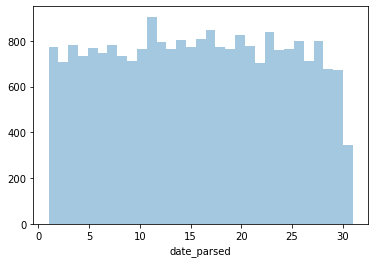

In [196]:
day_of_month_earthquakes.dropna(inplace=True)

sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

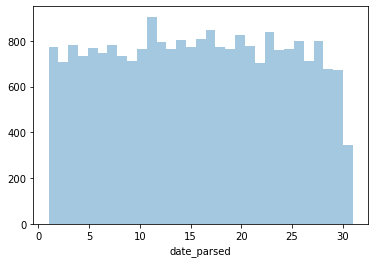

In [197]:
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

### Bonus
For an extra challenge, you'll work with a Smithsonian dataset that documents Earth's volcanoes and their eruptive history over the past 10,000 years

Run the next code cell to load the data.

In [200]:
volcanoes = pd.read_csv("datasets/volcanic-eruptions.csv")

Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [201]:
volcanoes['Last Known Eruption'].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object

# Character Encodings

In [23]:
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

### 1) What are encodings?

You're working with a dataset composed of bytes.  Run the code cell below to print a sample entry.

In [24]:
sample_entry = b'\xa7A\xa6n'
print(sample_entry)
print('data type:', type(sample_entry))

b'\xa7A\xa6n'
data type: <class 'bytes'>


You notice that it doesn't use the standard UTF-8 encoding. 

Use the next code cell to create a variable `new_entry` that changes the encoding from `"big5-tw"` to `"utf-8"`.  `new_entry` should have the bytes datatype.

In [25]:
new_entry = sample_entry.decode("big5-tw").encode("utf-8", errors="replace")
print(new_entry)
type(new_entry)

b'\xe4\xbd\xa0\xe5\xa5\xbd'


bytes

### 2) Reading in files with encoding problems

Use the code cell below to read in this file at path `"../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv"`.  

Figure out what the correct encoding should be and read in the file to a DataFrame `police_killings`.

In [36]:
with open ("datasets/police_killings/PoliceKillingsUS.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(30000))
    
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [31]:
police_killings = pd.read_csv("datasets/police_killings/PoliceKillingsUS.csv", encoding='Windows-1252')
police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### 3) Saving your files with UTF-8 encoding

Save a version of the police killings dataset to CSV with UTF-8 encoding.  Your answer will be marked correct after saving this file.  

Note: When using the `to_csv()` method, supply only the name of the file (e.g., `"my_file.csv"`).  This saves the file at the filepath `"/kaggle/working/my_file.csv"`.

In [32]:
# default is UTF-8
police_killings.to_csv("datasets/police_killings/PoliceKillingsUSutf-8.csv")

# Incosistent Data Entry

In [42]:
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

#read in all data
professors = pd.read_csv("datasets/pakistan_intellectual_capital.csv")

#set seed for rpeoducibility
np.random.seed(0)

### Do some preliminary text pre-processing
We'll begin by taking a quick look at the first few rows of the data.

In [43]:
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

# get the top 10 closes matches to south korea
countries = professors['Country'].unique()
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [44]:
def replace_matches_in_column(df, column, string_to_match, min_ratio=47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    
    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    
    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    
    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match
    
    print('Done!')
    

In [45]:
replace_matches_in_column(professors, 'Country', 'south korea')
countries = professors['Country'].unique()

Done!


In [46]:
countries

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'south korea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'macau', 'singapore', 'spain', 'japan',
       'hongkong', 'saudi arabia', 'mauritius', 'scotland'], dtype=object)

### 1) Examine another column

Write code below to take a look at all the unique values in the "Graduated from" column.

In [52]:
institutions = professors['Graduated from'].unique()
institutions.sort()
institutions

array([' Columbia University', ' Delft University of Technology',
       ' Iowa State University', ' University of Central Florida',
       ' University of Innsbruck',
       ' University of Texas at Arlington (UTA)', ' University of Turin',
       'Abasyn University', 'Abdul Wali Khan University, Mardan',
       'Abdus Salam School of Mathematical Sciences,GC University',
       'Agricultural University Peshawar', 'Allama Iqbal Open University',
       'Asian Institute of Technology', 'Aston University, Birmingham',
       'Australian National University, Caneberra', 'BUKC',
       'Bahauddin Zakariya University', 'Bahria University',
       'Bahria University,Islamabad',
       'Balochistan University of Information Technology, Engineering and Management Sciences',
       'Barani Institute of Information Technology',
       'Beaconhouse National University', 'Beihang University',
       'Beijing Institute of Technology',
       'Beijing Institute of Technology Beijing',
       'Beiji

Do you notice any inconsistencies in the data?  Can any of the inconsistencies in the data be fixed by removing white spaces at the beginning and end of cells?

Once you have answered these questions, run the code cell below to get credit for your work.

### 2) Do some text pre-processing

Convert every entry in the "Graduated from" column in the `professors` DataFrame to remove white spaces at the beginning and end of cells.

In [57]:
# convert to lower case
professors['Graduated from'] = professors['Graduated from'].str.lower()
# remove trailing white spaces
professors['Graduated from'] = professors['Graduated from'].str.strip()

### 3) Continue working with countries

In the tutorial, we focused on cleaning up inconsistencies in the "Country" column.  Run the code cell below to view the list of unique values that we ended with.

In [58]:
# get all the unique values in the 'City' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

Take another look at the "Country" column and see if there's any more data cleaning we need to do.

It looks like 'usa' and 'usofa' should be the same country.  Correct the "Country" column in the dataframe so that 'usofa' appears instead as 'usa'.

**Use the most recent version of the DataFrame (with the whitespaces at the beginning and end of cells removed) from question 2.**

In [59]:
replace_matches_in_column(professors, 'Country', 'usa', 70)
countries = professors['Country'].unique()

Done!


In [60]:
countries

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usa', 'south korea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'finland', 'netherland',
       'greece', 'turkey', 'macau', 'singapore', 'spain', 'japan',
       'hongkong', 'saudi arabia', 'mauritius', 'scotland'], dtype=object)